In [1]:
%matplotlib inline
import pandas as pd
from io import StringIO
# サンプルデータを作成
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
# サンプルデータを読み込む
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
# 欠測値を含む行を削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
# 欠測値を含む列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
# 全ての列がNaNである行だけを削除
df.dropna(how='all')
# 非NaN値が4つ未満の行を削除
df.dropna(thresh=4)
# 特定の列（この場合'C')にNaNが含まれている行だけを削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [6]:
from sklearn.preprocessing import Imputer
# 欠測値補完のインスタンスを生成（平均値補完）
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# データを適合
imr = imr.fit(df)
# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [7]:
import pandas as pd
# サンプルデータを生成（Tシャツの色・サイズ・価格・クラスラベル）
df=pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ])
#列名を設定
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [8]:
#Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping={'XL':3, 'L':2,'M':1}
#Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [9]:
import numpy as np
# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [10]:
#クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [11]:
# 整数とクラスラベルを対応させるディクショナリを生成
inv_class_mapping = {v:k for k,v in class_mapping.items()}
#整数からクラスラベルに変換
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダのインスタンスを生成
class_le = LabelEncoder()
#クラスラベルから整数に変換
y=class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [13]:
# クラスラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [14]:
# Tシャツの色、サイズ、価格を抽出
X=df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
# one-hotエンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])
# one-hotエンコーディングを実行
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [16]:
# one-hotエンコーディングを実行
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


In [17]:
# wineデータセットを読み込む
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# 列名を設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# クラスラベルを表示
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [18]:
# wineデータセットの先頭５行を表示
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
from sklearn.cross_validation import train_test_split
# 特徴量とクラスラベルを別々に抽出
X, y= df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler
# min-maxスケーリングのインスタンスを生成
mms = MinMaxScaler()
# トレーニングデータをスケーリング
X_train_norm = mms.fit_transform(X_train)
# テストデータをスケーリング
X_test_norm = mms.transform(X_test)

In [21]:
from sklearn.preprocessing import StandardScaler
# 標準化のインスタンスを生成（平均＝０、標準偏差＝１に変換）
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
# L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# L1正則化ロジスティック回帰のインスタンスを生成(逆正則化パラメータC=0.1)
lr = LogisticRegression(penalty='l1', C=0.1)
# トレーニングデータに適合
lr.fit(X_train_std, y_train)
# トレーニングデータに対する正解率の表示
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [24]:
# テストデータに対する正解率の表示
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.981481481481


In [25]:
# 切片の表示
lr.intercept_

array([-0.38379403, -0.15813491, -0.7003885 ])

In [26]:
# 重み係数の表示
lr.coef_

array([[ 0.2802661 ,  0.        ,  0.        , -0.02786659,  0.        ,
         0.        ,  0.71007292,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23610822],
       [-0.64376624, -0.06890245, -0.05718034,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92711893,
         0.05984553,  0.        , -0.37100738],
       [ 0.        ,  0.0614575 ,  0.        ,  0.        ,  0.        ,
         0.        , -0.63654092,  0.        ,  0.        ,  0.4983247 ,
        -0.35817796, -0.57070772,  0.        ]])

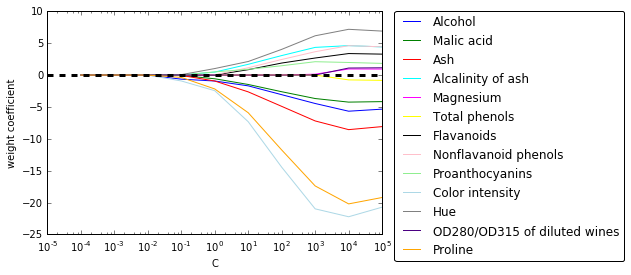

In [27]:
import matplotlib.pyplot as plt
# 絵画の準備
fig = plt.figure()
ax=plt.subplot(111)
# 各係数の色のリスト
colors = ['blue', 'green','red','cyan', 'magenta', 'yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
# 空のリストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []
# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
# 重み係数をNumPy配列に変換
weights = np.array(weights)
# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    # 横軸を逆正則化パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
# y=0に黒い波線を引く
plt.axhline(0, color='black', linestyle='--', linewidth=3)
# 横軸の範囲の設定
plt.xlim([10**(-5), 10**5])
# 軸のラベルの設定
plt.ylabel('weight coefficient')
plt.xlabel('C')
# 横軸を対数スケールに設定
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()